In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os




In [125]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Data/Dataframelimpa_sem_latlong.csv")

In [126]:
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'

df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013000
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661000
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017000
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700000
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075000
58511,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,03971000,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,04119000
58512,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,05141000,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955000
58513,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610000,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,04039000


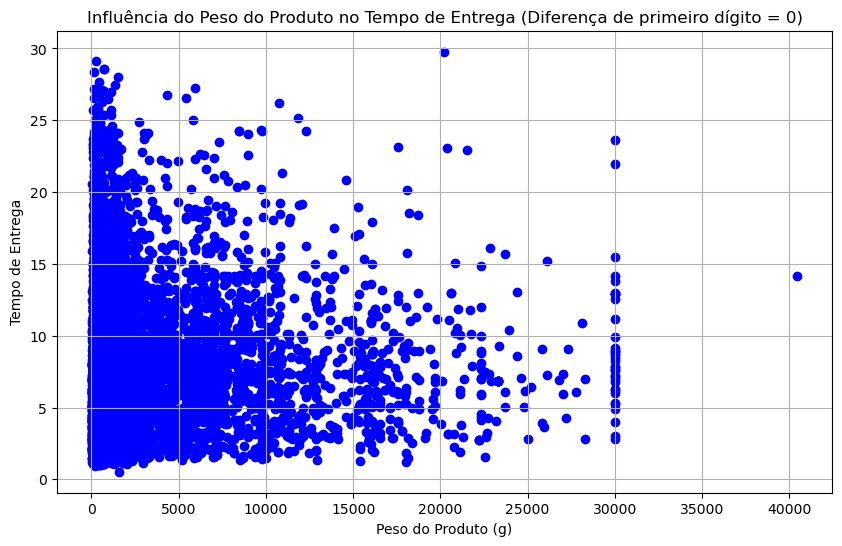

In [127]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero
df_filtered = df[df['seller_first_digit'] - df['customer_first_digit'] == 0]

# Plotando um gráfico para mostrar como o product_weight_g influencia no delivery_time
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_weight_g'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Peso do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0)')
plt.grid(True)
plt.show()

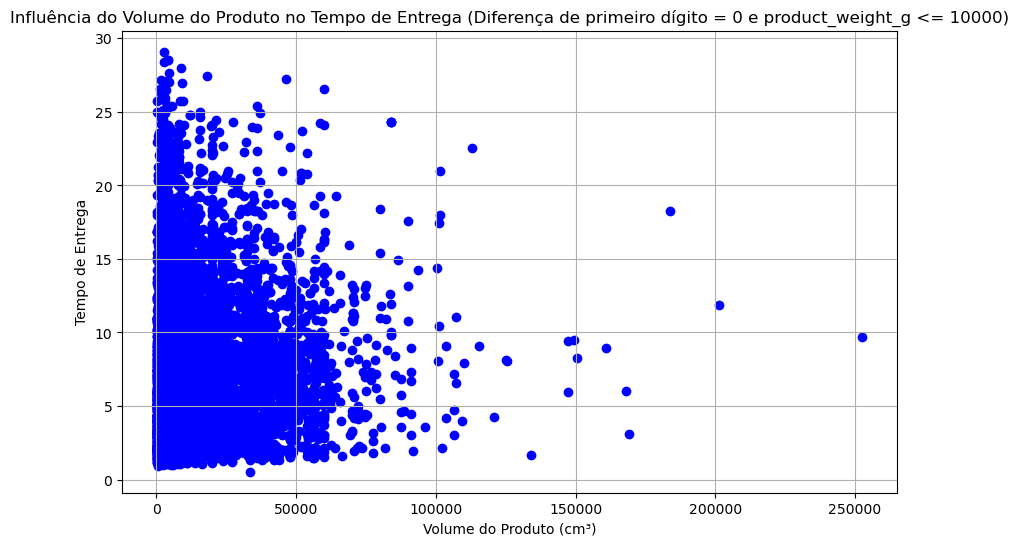

In [128]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Calculando o volume do produto em cm³
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero e o preço do produto é <= 1000
df_filtered = df[(df['seller_first_digit'] - df['customer_first_digit'] == 0) & (df['product_weight_g'] <= 10000)]

# Plotando um gráfico para mostrar como o volume do produto influencia no tempo de entrega
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_volume_cm3'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Volume do Produto (cm³)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Volume do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0 e product_weight_g <= 10000)')
plt.grid(True)
plt.show()

In [129]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,seller_first_digit,customer_first_digit,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013000,2,2,3528.0
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661000,3,3,14157.0
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017000,1,3,2880.0
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700000,0,1,2700.0
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075000,0,1,5760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075000,1,5,8000.0
58511,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,03971000,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,04119000,0,0,9900.0
58512,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,05141000,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955000,0,5,13500.0
58513,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610000,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,04039000,8,0,9576.0


Pedido em aprovação
Separando o pedido
Pedido em transporte
product_weight_g	
product_length_cm	
product_height_cm	
product_width_cm
payment_sequential (o que é isso?)
payment_installments(parcelas)
payment_value
product_volume_cm3


product_category_name
payment_type




target: delivery_time


In [130]:
""" colunas=["Pedido em aprovação","Separando o pedido","Pedido em transporte","product_weight_g",	
"product_length_cm"	,
"product_height_cm"	,
"product_width_cm",
"payment_sequential",
"payment_installments",
"payment_value",
"product_volume_cm3",
"product_category_name",
"payment_type",
'delivery_time'] """

colunas=colunas=["Pedido em aprovação","Separando o pedido","Pedido em transporte","product_weight_g",	
"product_length_cm"	,
"product_height_cm"	,
"product_width_cm",
"payment_sequential",
"payment_installments",
"payment_value",
"product_volume_cm3",
"payment_type",
'delivery_time']

df_analise=df[colunas]
df_analise


,Pedido em aprovação,Separando o pedido,Pedido em transporte,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,product_volume_cm3,payment_type,delivery_time
0,0.03,6.37,1.21,650.0,28.0,9.0,14.0,1,2,72.19,3528.0,credit_card,7.61
1,0.01,1.91,6.03,3050.0,33.0,13.0,33.0,1,5,216.87,14157.0,credit_card,7.95
2,1.26,0.30,5.11,450.0,24.0,8.0,15.0,1,1,34.59,2880.0,boleto,6.67
3,0.01,1.54,6.87,200.0,27.0,5.0,20.0,1,1,31.75,2700.0,credit_card,8.42
4,1.00,7.25,1.74,2000.0,30.0,12.0,16.0,1,3,157.60,5760.0,credit_card,9.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,0.01,4.29,16.61,175.0,20.0,20.0,20.0,1,4,456.28,8000.0,credit_card,20.91
58511,0.05,3.52,1.15,750.0,30.0,30.0,11.0,1,1,101.73,9900.0,credit_card,4.72
58512,0.04,2.06,18.98,2700.0,60.0,15.0,15.0,1,7,273.92,13500.0,credit_card,21.08
58513,1.00,1.92,1.88,967.0,21.0,24.0,19.0,1,3,116.85,9576.0,credit_card,4.80


In [131]:
df_dummies=pd.get_dummies(df_analise)
matriz=df_dummies.corr()
matriz

,Pedido em aprovação,Separando o pedido,Pedido em transporte,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,product_volume_cm3,delivery_time,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
Pedido em aprovação,1.000000,-0.002352,0.013941,0.018879,-0.003335,0.006016,-0.000255,-0.005578,-0.122610,0.055600,0.016382,0.074194,0.595955,-0.484383,0.004906,-0.025692
Separando o pedido,-0.002352,1.000000,0.014082,0.057334,0.048164,0.047611,0.058617,0.011821,0.013991,0.016426,0.065090,0.328000,-0.003948,0.001028,-0.001298,0.004371
Pedido em transporte,0.013941,0.014082,1.000000,0.024790,0.035643,0.003961,0.019420,-0.009334,0.053996,0.045268,0.010781,0.947179,0.000133,0.003896,-0.008572,-0.002987
product_weight_g,0.018879,0.057334,0.024790,1.000000,0.432011,0.550757,0.501030,0.019799,0.187570,0.345325,0.777835,0.042561,-0.021855,0.022561,-0.018042,0.000667
product_length_cm,-0.003335,0.048164,0.035643,0.432011,1.000000,0.154299,0.546006,0.027746,0.120989,0.141918,0.530418,0.048527,-0.023005,0.013007,-0.008937,0.014319
product_height_cm,0.006016,0.047611,0.003961,0.550757,0.154299,1.000000,0.285601,0.013404,0.121052,0.236034,0.715766,0.019090,-0.020048,0.023266,-0.016575,-0.003682
product_width_cm,-0.000255,0.058617,0.019420,0.501030,0.546006,0.285601,1.000000,0.026542,0.154204,0.184052,0.637298,0.036727,-0.026593,0.020011,-0.013981,0.009808
payment_sequential,-0.005578,0.011821,-0.009334,0.019799,0.027746,0.013404,0.026542,1.000000,-0.100803,-0.083474,0.032516,-0.005413,-0.054939,-0.275381,-0.011080,0.542815
payment_installments,-0.122610,0.013991,0.053996,0.187570,0.120989,0.121052,0.154204,-0.100803,1.000000,0.356121,0.164065,0.047673,-0.280848,0.365936,-0.076722,-0.186071
payment_value,0.055600,0.016426,0.045268,0.345325,0.141918,0.236034,0.184052,-0.083474,0.356121,1.000000,0.299203,0.051243,-0.012660,0.086267,-0.022806,-0.116803


<Axes: >

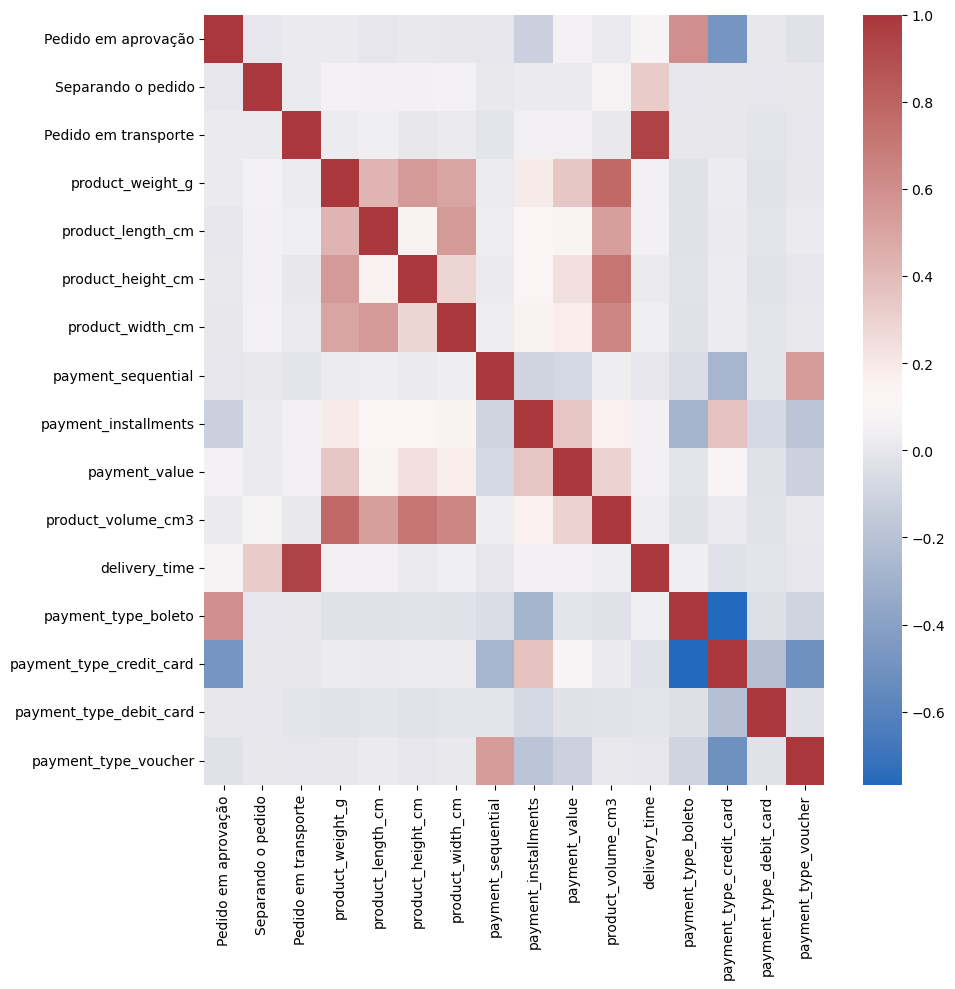

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(data=matriz,cmap="vlag")


In [133]:
matriz["delivery_time"].sort_values(ascending=False)

delivery_time               1.000000
Pedido em transporte        0.947179
Separando o pedido          0.328000
Pedido em aprovação         0.074194
payment_value               0.051243
product_length_cm           0.048527
payment_installments        0.047673
product_weight_g            0.042561
product_width_cm            0.036727
payment_type_boleto         0.035729
product_volume_cm3          0.031657
product_height_cm           0.019090
payment_type_voucher       -0.003023
payment_sequential         -0.005413
payment_type_debit_card    -0.008171
payment_type_credit_card   -0.025959
Name: delivery_time, dtype: float64

Analisando algumas relações entre as variáveis (colunas)

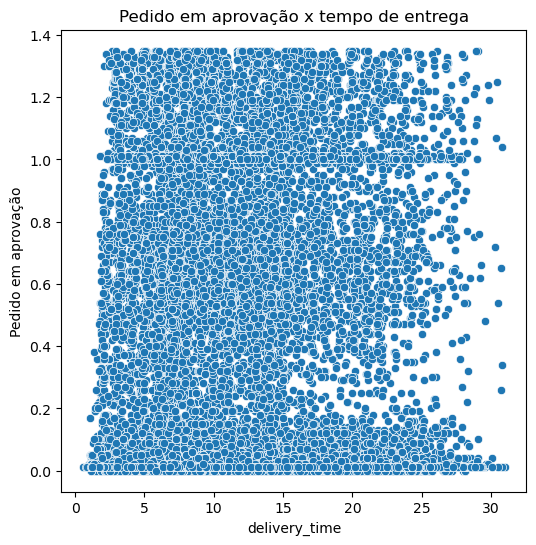

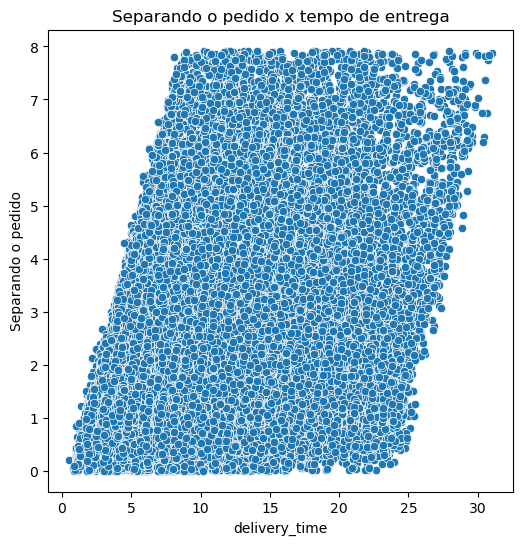

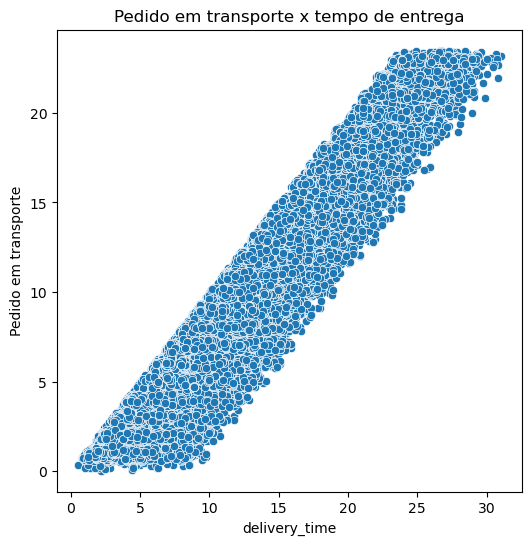

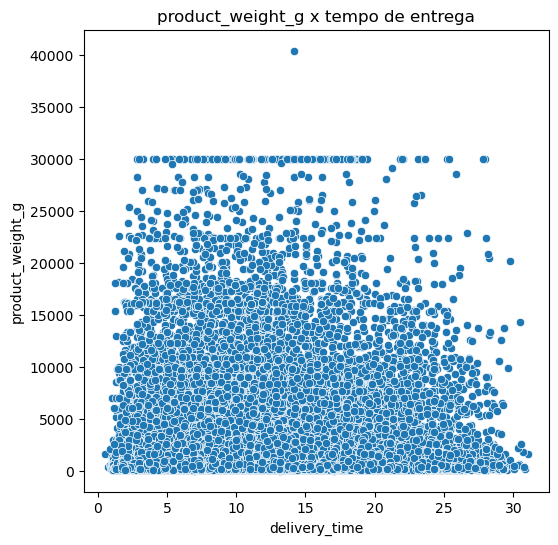

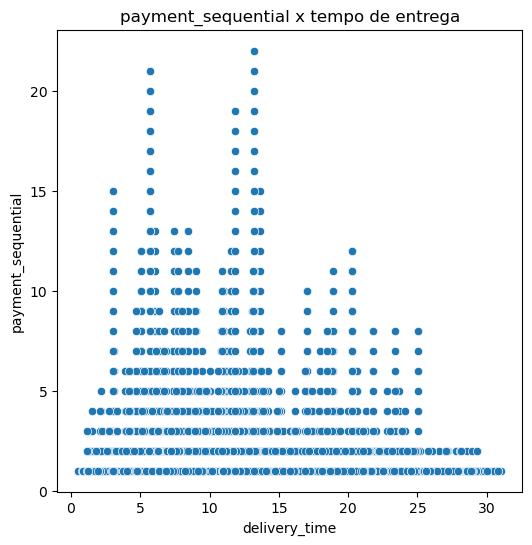

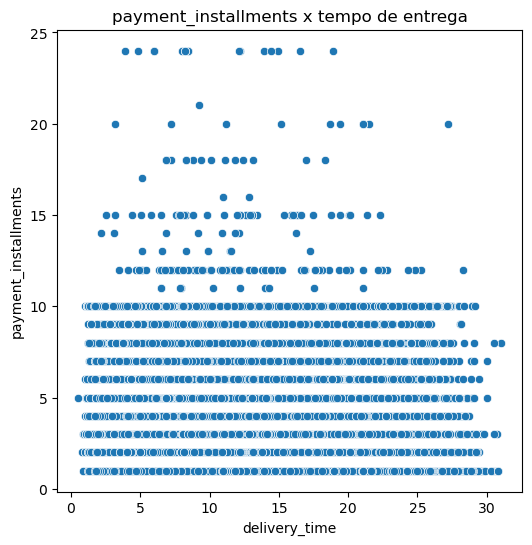

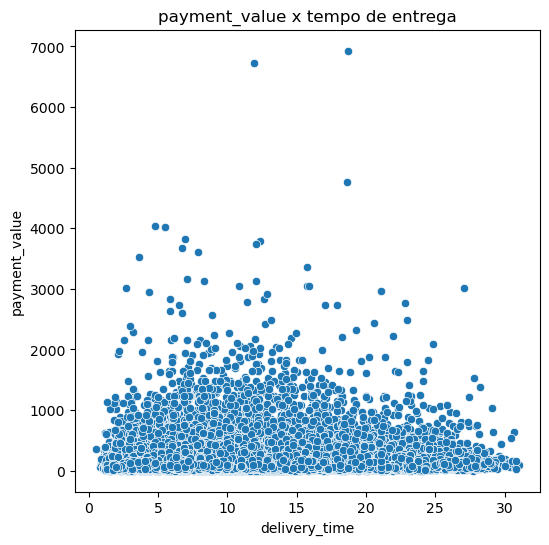

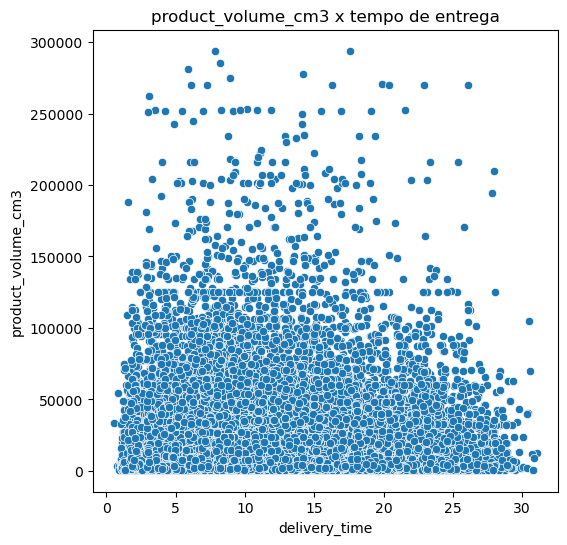

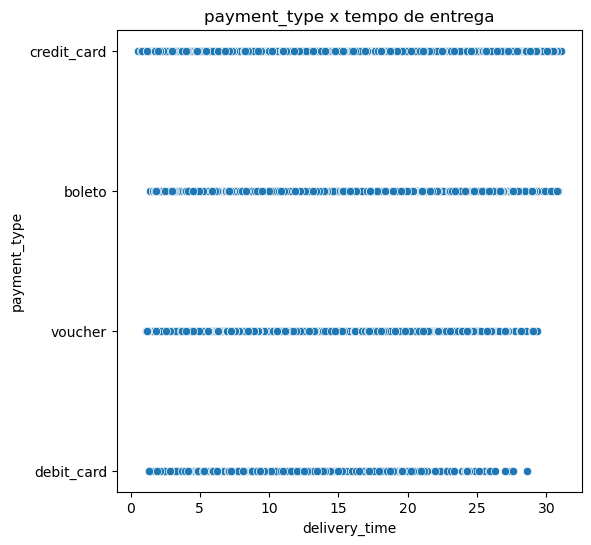

In [134]:
for coluna in df_analise.columns:
    nao_pegar=["delivery_time","product_length_cm","product_height_cm","product_width_cm"]
    if coluna not in nao_pegar:
        plt.figure(figsize=(6,6))
        sns.scatterplot(data=df_analise,x="delivery_time",y=coluna,)
        plt.title(f"{coluna} x tempo de entrega")

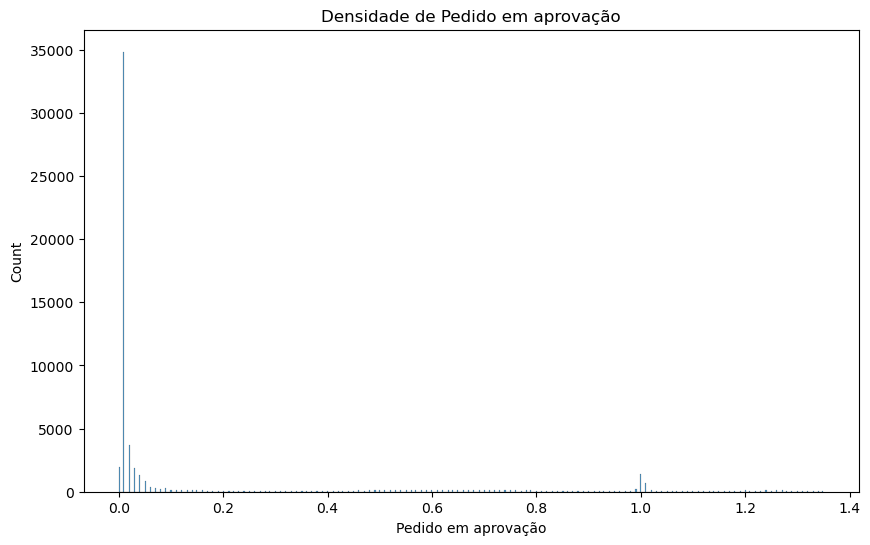

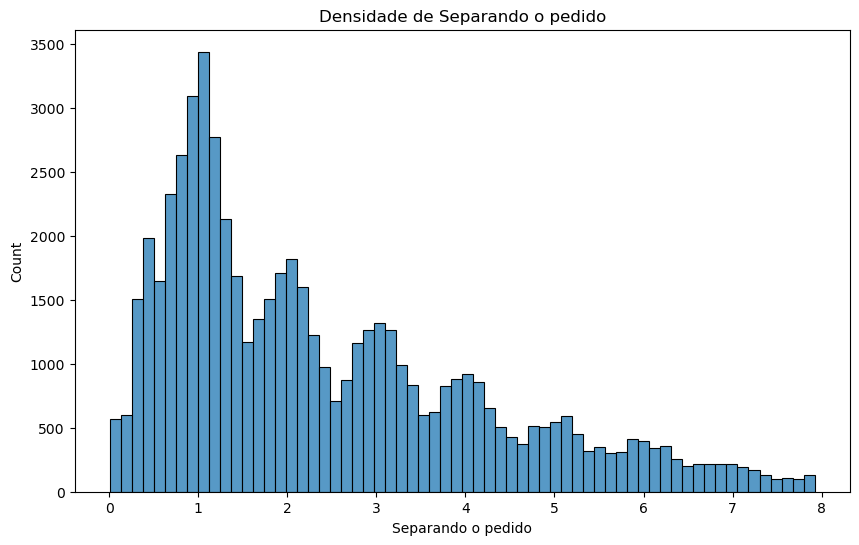

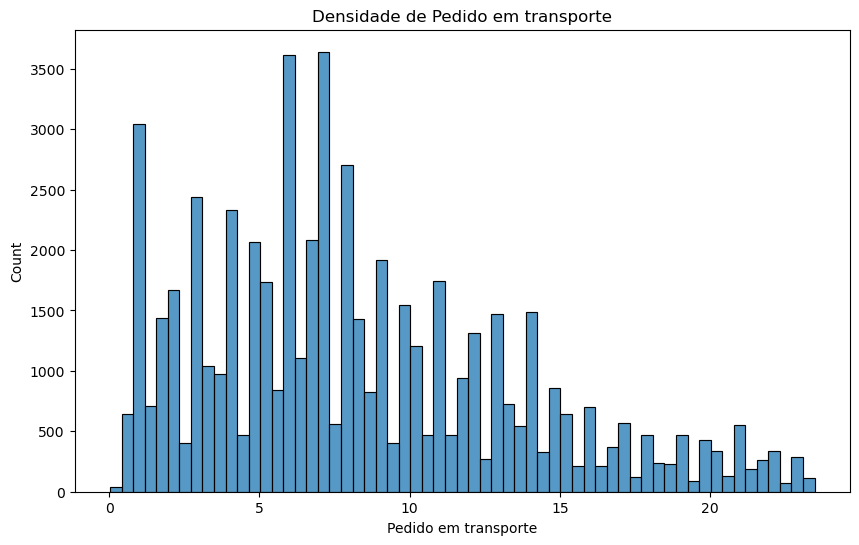

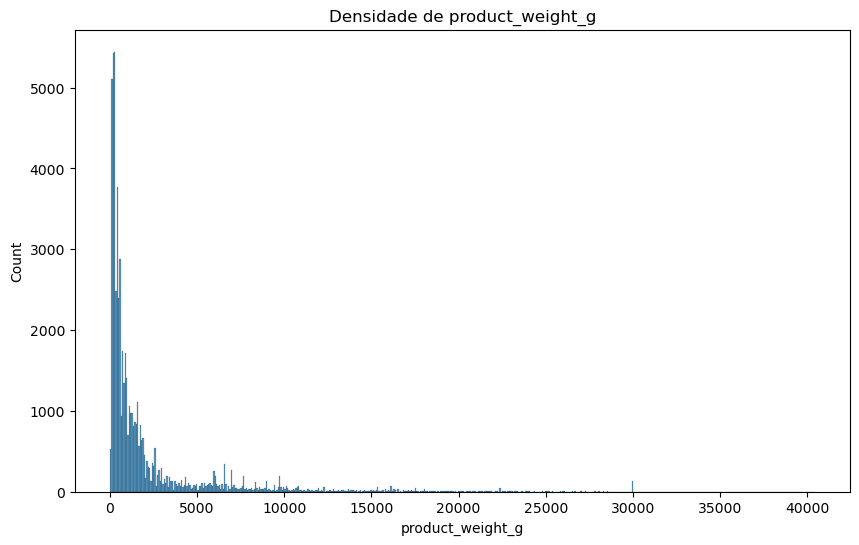

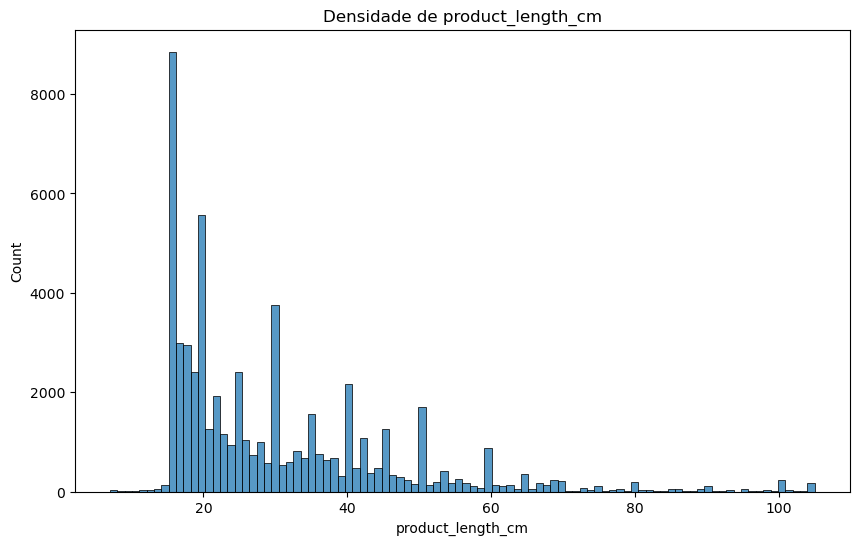

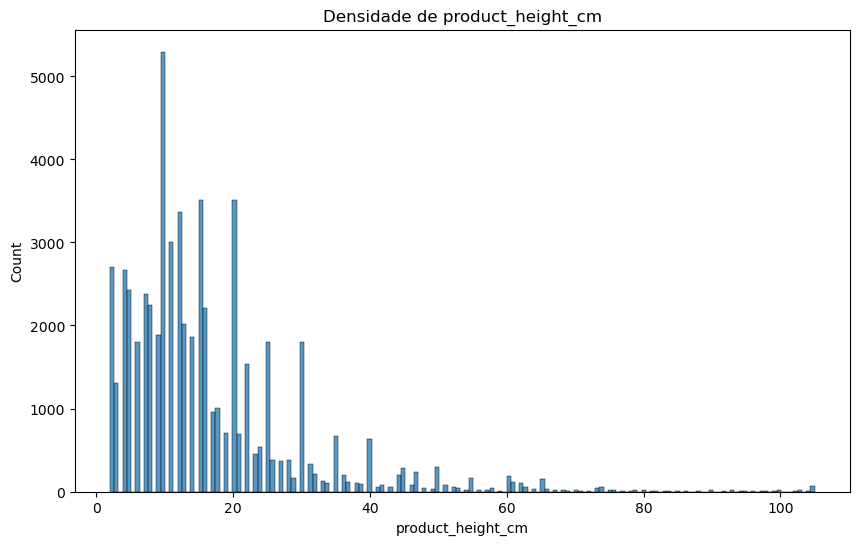

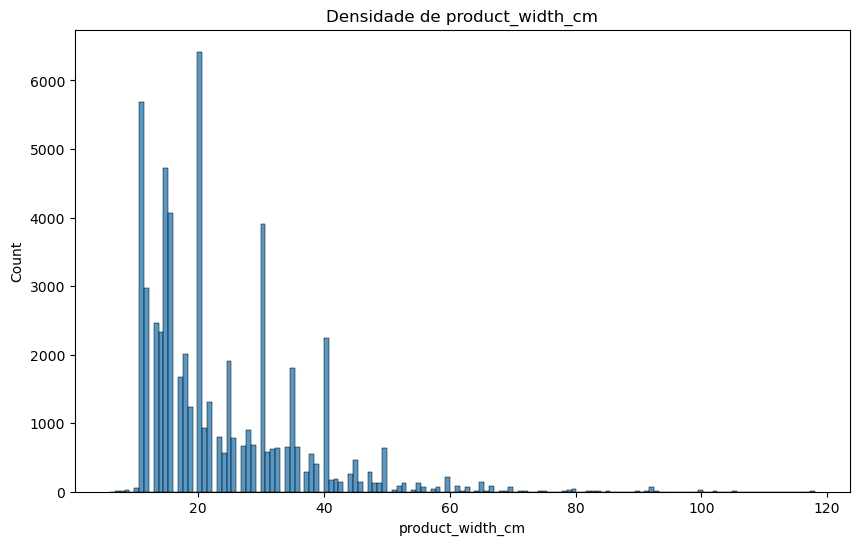

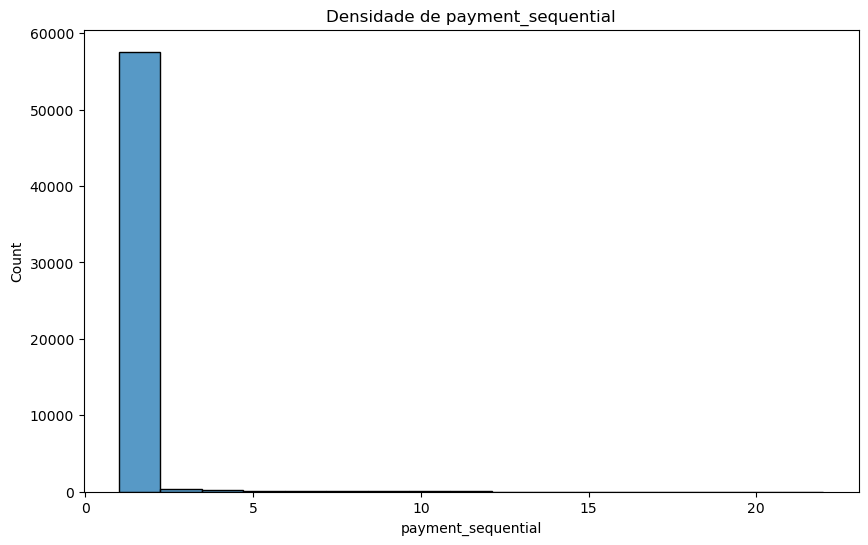

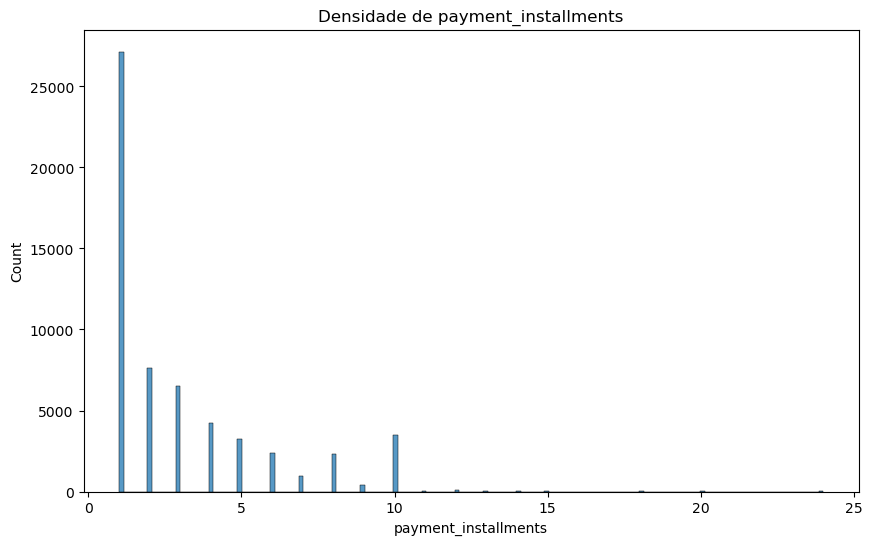

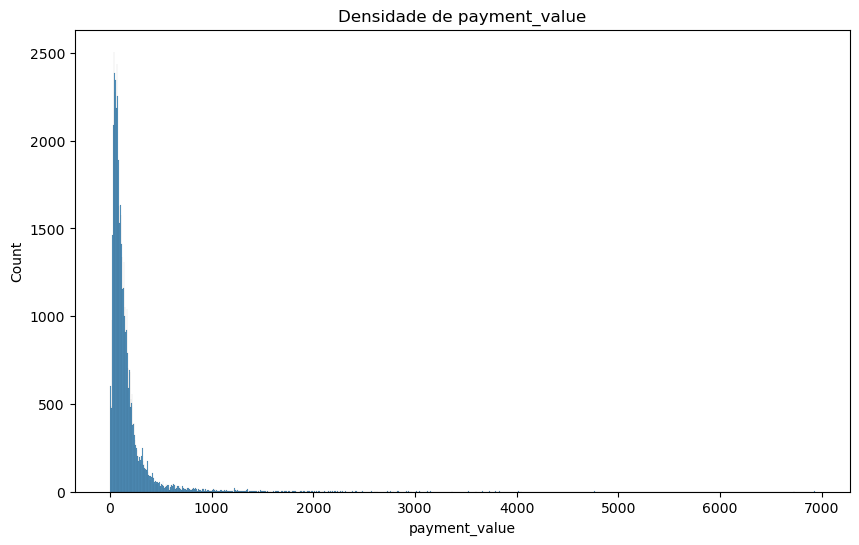

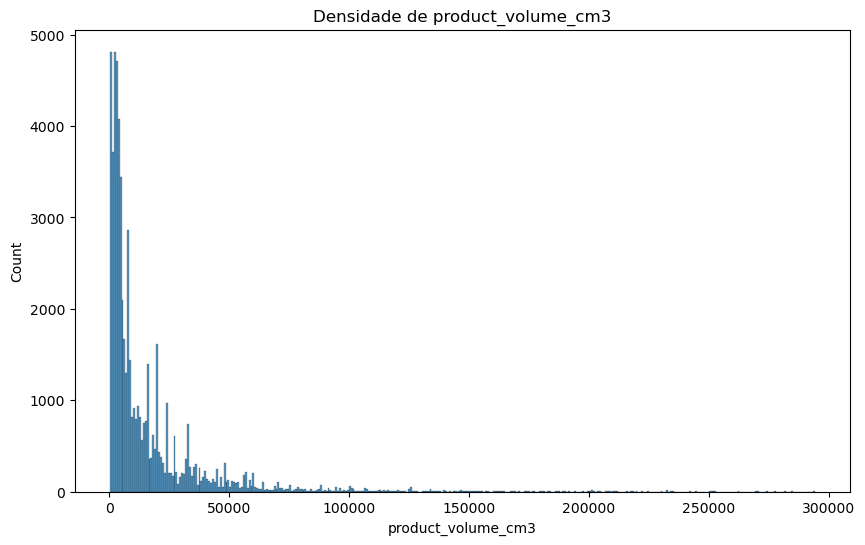

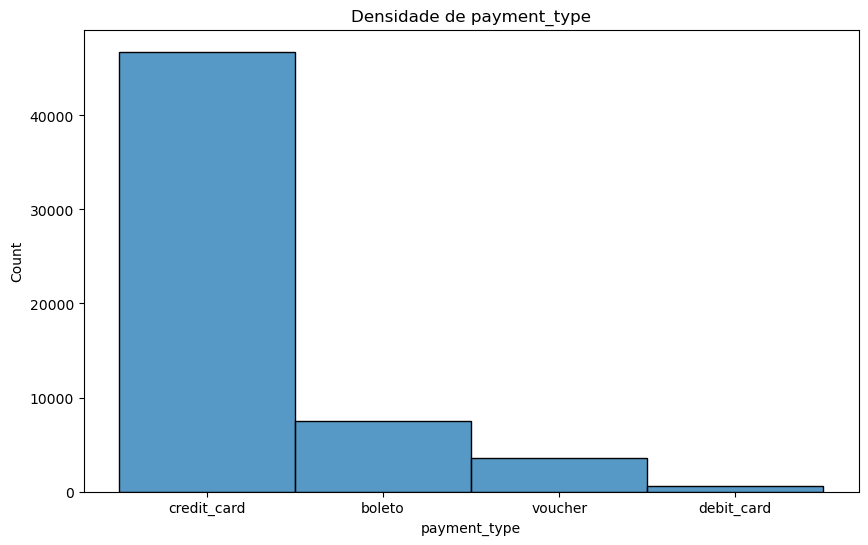

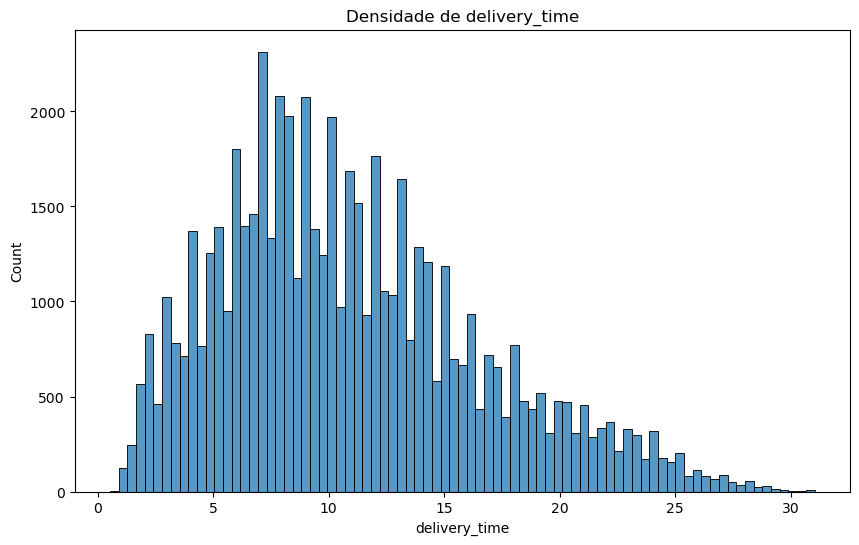

In [135]:
for coluna in df_analise:
    plt.figure(figsize=(10,6))
    sns.histplot(df[coluna])
    plt.title(f"Densidade de {coluna}")

In [136]:
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"])

In [137]:
df["ANO"]=df["order_delivered_customer_date"].dt.year

In [138]:
df["ANO"].unique()



array([2017, 2018, 2016])

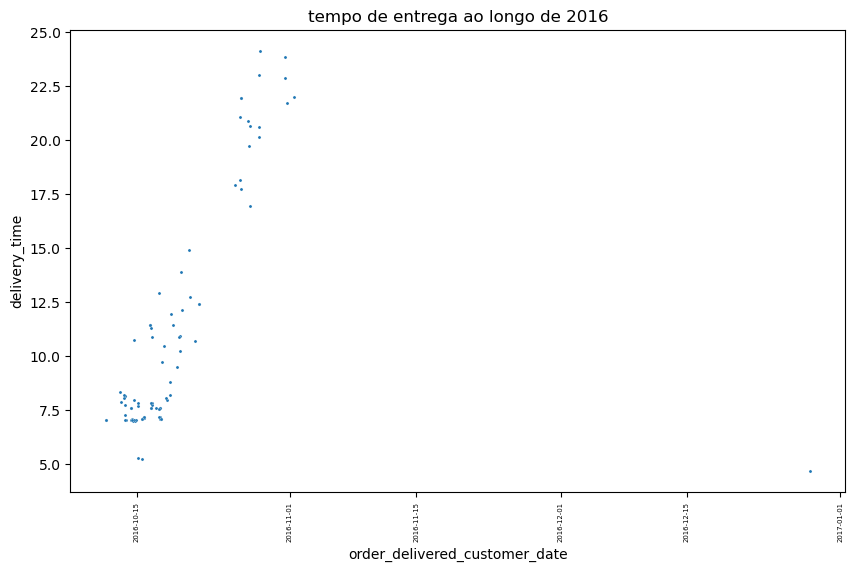

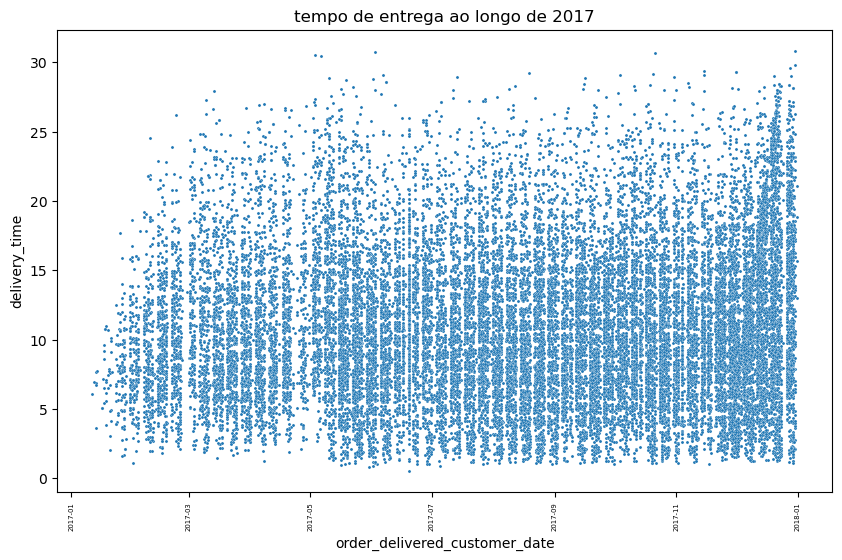

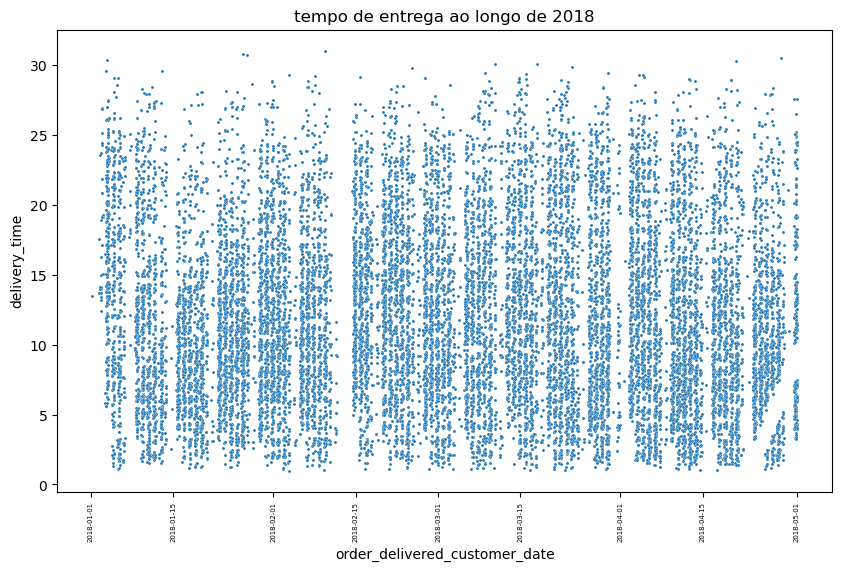

In [139]:

for ano in sorted(df["ANO"].unique()):
    df_ano=df[df["ANO"]==ano]
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_ano,x="order_delivered_customer_date",y="delivery_time",s=5)
    plt.xticks(rotation=90,fontsize=5)
    plt.title(f"tempo de entrega ao longo de {ano}")
    plt.show

In [140]:
df_ano=df[df["ANO"]==2016]

In [141]:
df_ano["order_delivered_customer_date"].dt.month.unique()

array([10, 11, 12])

In [142]:
df_ano=df[df["ANO"]==2017]

In [143]:
df_ano["order_delivered_customer_date"].dt.month.unique()

array([ 9,  5, 12,  8,  4, 10,  6,  2,  3, 11,  7,  1])

In [144]:
df_ano=df[df["ANO"]==2018]

In [145]:
df_ano["order_delivered_customer_date"].dt.month.unique()

array([1, 3, 2, 4])

In [146]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
Pedido em aprovação                 0
order_approved_at                   0
Separando o pedido                  0
order_delivered_carrier_date        0
Pedido em transporte                0
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1034
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
seller_first

order_purchase_timestamp            0
Pedido em aprovação                 0
order_approved_at                   0
Separando o pedido                  0
order_delivered_carrier_date        0
Pedido em transporte                0
order_delivered_customer_date       0


delivery_time                       0


product_category_name            1034
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_volume_cm3                  0

In [147]:
display(df)

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,seller_first_digit,customer_first_digit,product_volume_cm3,ANO
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013000,2,2,3528.0,2017
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661000,3,3,14157.0,2018
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017000,1,3,2880.0,2017
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700000,0,1,2700.0,2017
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075000,0,1,5760.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075000,1,5,8000.0,2018
58511,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,03971000,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,04119000,0,0,9900.0,2017
58512,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,05141000,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955000,0,5,13500.0,2018
58513,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610000,1,credit_card,3,116.85,cd79b40782

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       58515 non-null  object        
 1   customer_id                    58515 non-null  object        
 2   order_status                   58515 non-null  object        
 3   order_purchase_timestamp       58515 non-null  object        
 4   Pedido em aprovação            58515 non-null  float64       
 5   order_approved_at              58515 non-null  object        
 6   Separando o pedido             58515 non-null  float64       
 7   order_delivered_carrier_date   58515 non-null  object        
 8   Pedido em transporte           58515 non-null  float64       
 9   order_delivered_customer_date  58515 non-null  datetime64[ns]
 10  delivery_time                  58515 non-null  float64       
 11  delivery_time_m

In [149]:
df["order_approved_at"]=pd.to_datetime(df["order_approved_at"])
df["order_purchase_timestamp"]=pd.to_datetime(df["order_purchase_timestamp"])

In [150]:
ped=df["order_purchase_timestamp"].dt.hour
apr=df["order_approved_at"].dt.hour
df.insert(4,"Horário do pedido",ped)
df.insert(7,"Horário da aprovação",apr)

In [151]:
display(df)

,order_id,customer_id,order_status,order_purchase_timestamp,Horário do pedido,Pedido em aprovação,order_approved_at,Horário da aprovação,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,seller_first_digit,customer_first_digit,product_volume_cm3,ANO
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,8,0.03,2017-09-13 09:45:35,9,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013000,2,2,3528.0,2017
1,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,14,0.01,2018-01-14 14:48:30,14,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661000,3,3,14157.0,2018
2,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,21,1.26,2017-05-17 03:55:27,3,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017000,1,3,2880.0,2017
3,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,11,0.01,2017-12-10 12:10:31,12,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700000,0,1,2700.0,2017
4,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,18,1.00,2018-03-20 18:35:21,18,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075000,0,1,5760.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,12,0.01,2018-03-17 12:29:22,12,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075000,1,5,8000.0,2018
58511,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,9,0.05,2017-11-24 10:11:58,10,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,03971000,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,04119000,0,0,9900.0,2017
58512,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,16,0.04,2017-12-18 17:33:04,17,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,05141000,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955000,0,5,13500.0,2018
58513,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,17,1.00,2017-10-24 17:14:25,17,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer

<Axes: xlabel='Horário do pedido', ylabel='Count'>

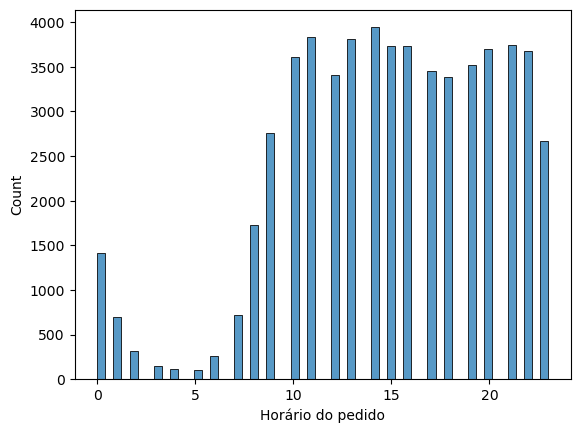

In [155]:
sns.histplot(df["Horário do pedido"])

<Axes: xlabel='Horário da aprovação', ylabel='Count'>

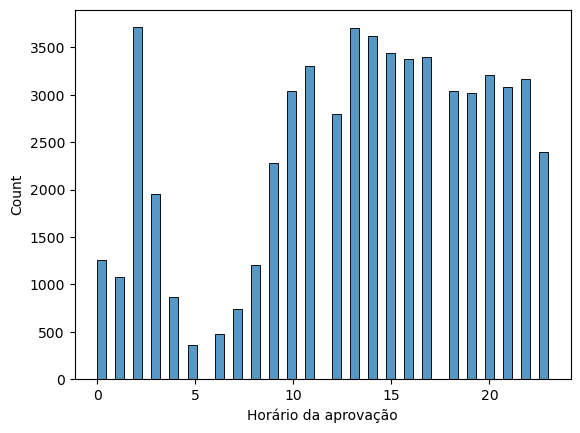

In [157]:
sns.histplot(df["Horário da aprovação"])

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


<Axes: xlabel='Horário do pedido', ylabel='delivery_time'>

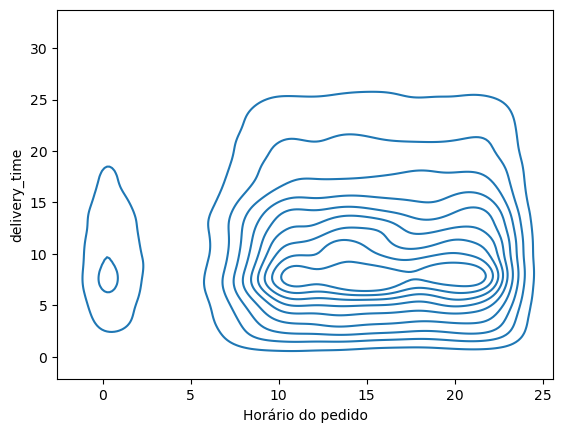

In [162]:
sns.kdeplot(data=df,x="Horário do pedido",y="delivery_time",s=0.5)

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


<Axes: xlabel='Horário da aprovação', ylabel='delivery_time'>

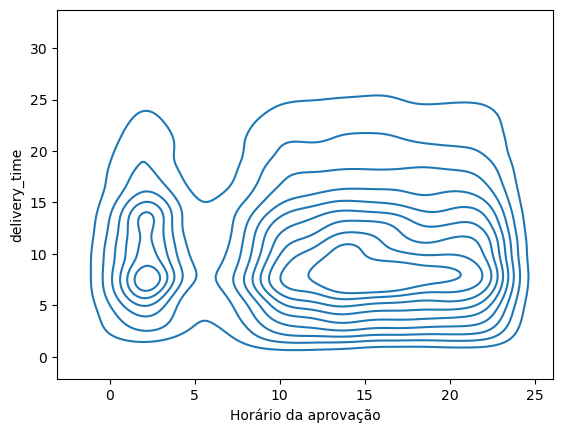

In [161]:
sns.kdeplot(data=df,x="Horário da aprovação",y="delivery_time",s=0.5)